In [75]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2 as cv
import PIL.Image as pim
import math
import os

#### Using fft.dct

In [2]:
from scipy import fft
test = fft.dct([1, 2, 3, 4], 2, norm='ortho') # Use SciPy

In [3]:
test

array([ 5.        , -2.2304425 ,  0.        , -0.15851267])

#### Build 1D-DCT II Function

In [4]:
def dct(data):
    N = len(data)
    f = 0
    cof = np.zeros(N)
    for k in range(N):
        if k==0:
            f = math.sqrt(1/(4*N))
        else:
            f = math.sqrt(1/(2*N))

        s = 0
        for n in range(N):
            out = data[n] * math.cos((math.pi*k) / (2*N) * (2*n+1))
            s = s + out
        cof[k] = 2 * f * s
        
    return np.around(cof, decimals=7)

In [5]:
data = np.array([1,2, 3, 4])
data

array([1, 2, 3, 4])

In [6]:
output = dct(data)
output

array([ 5.       , -2.2304425, -0.       , -0.1585127])

#### Data-1D -> Signal 

In [7]:
data1D = np.random.randint(256, size=1024)
data1D

array([134, 136, 235, ..., 160, 176,   8])

In [8]:
N1D = len(data1D)
index1D = np.arange(N1D)
index1D

array([   0,    1,    2, ..., 1021, 1022, 1023])

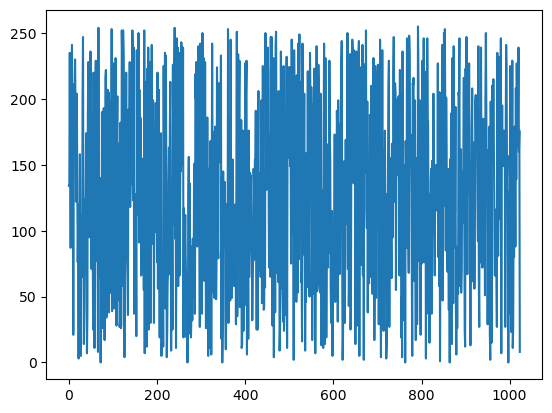

In [9]:
plt.plot(index1D, data1D)

In [10]:
output1D = dct(data1D)
output1D

array([4058.4375   ,  -91.5279406,   34.6958612, ..., -107.0884344,
          9.1617454,  -60.571451 ])

In [11]:
o1D = fft.dct(data1D, norm='ortho') # Use SciPy
o1D

array([4058.4375    ,  -91.52794057,   34.69586122, ..., -107.08843438,
          9.16174539,  -60.57145101])

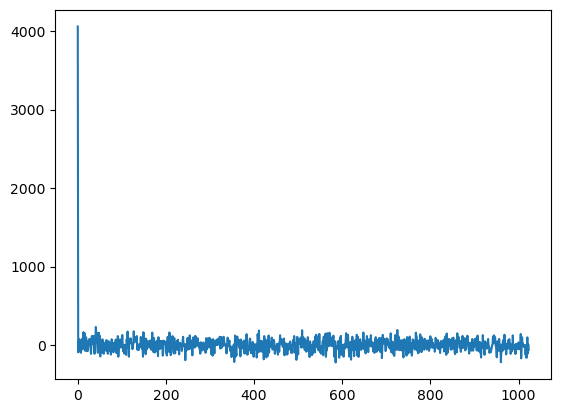

In [12]:
plt.plot(index1D, output1D)

#### Inverse 1D-DCT II Function

In [13]:
def idct(cof):
    N = len(cof)
    data = np.zeros(N)
    for k in range(N):
        s = 0
        for n in range(1, N):
            out = cof[n] * math.cos(math.pi/(2*N)*((2*k)+1)*n)
            s = s + out
        data[k] = (cof[0]/math.sqrt(N)) + (math.sqrt(2/N)*s)
        
    return np.around(data, decimals=7)

In [14]:
output1D_i = idct(output1D)
output1D_i

array([134.       , 135.9999999, 235.       , ..., 160.       ,
       176.       ,   7.9999999])

In [15]:
o1D_i = fft.idct(output1D, norm='ortho') # Use SciPy
o1D_i

array([134.00000001, 135.99999994, 234.99999999, ..., 159.99999998,
       175.99999996,   7.99999994])

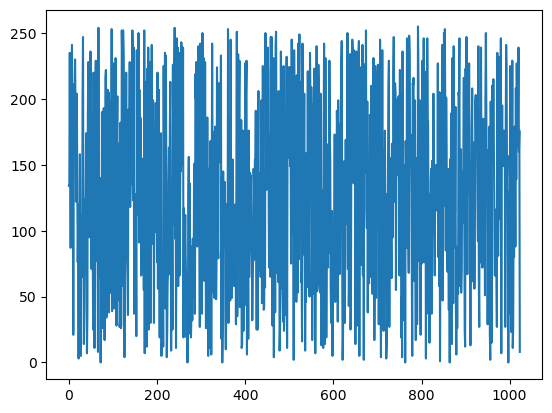

In [16]:
plt.plot(index1D, output1D_i)

In [17]:
cpath = os.getcwd()
cpath

'C:\\Personal\\Local\\Coding\\Projects\\C++\\DCT\\Lab'

In [18]:
wpath = os.chdir('C:\\Personal\\Local\\Coding\\Projects\\C++\\DCT\\OriginalImg')
cpath = os.getcwd()
cpath

'C:\\Personal\\Local\\Coding\\Projects\\C++\\DCT\\OriginalImg'

#### Read Grayscale Image

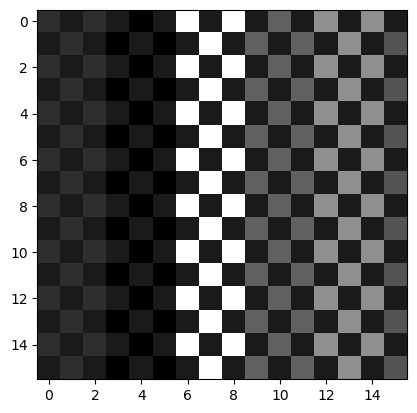

In [19]:
l1 = 'Grayscale'
path = os.path.join(cpath, l1)
imlist = os.listdir(path)
impath = os.path.join(path, imlist[0])

gArr = cv.imread(impath, cv.IMREAD_GRAYSCALE)
plt.imshow(gArr, cmap='gray')

In [20]:
gArr

array([[ 91,  79,  91,  79,  63,  79, 218,  79, 218,  79, 122,  79, 150,
         79, 150,  79],
       [ 79,  91,  79,  63,  79,  63,  79, 218,  79, 122,  79, 122,  79,
        150,  79, 114],
       [ 91,  79,  91,  79,  63,  79, 218,  79, 218,  79, 122,  79, 150,
         79, 150,  79],
       [ 79,  91,  79,  63,  79,  63,  79, 218,  79, 122,  79, 122,  79,
        150,  79, 114],
       [ 91,  79,  91,  79,  63,  79, 218,  79, 218,  79, 122,  79, 150,
         79, 150,  79],
       [ 79,  91,  79,  63,  79,  63,  79, 218,  79, 122,  79, 122,  79,
        150,  79, 114],
       [ 91,  79,  91,  79,  63,  79, 218,  79, 218,  79, 122,  79, 150,
         79, 150,  79],
       [ 79,  91,  79,  63,  79,  63,  79, 218,  79, 122,  79, 122,  79,
        150,  79, 114],
       [ 91,  79,  91,  79,  63,  79, 218,  79, 218,  79, 122,  79, 150,
         79, 150,  79],
       [ 79,  91,  79,  63,  79,  63,  79, 218,  79, 122,  79, 122,  79,
        150,  79, 114],
       [ 91,  79,  91,  79,  6

In [21]:
gArr.shape

(16, 16)

In [22]:
index_dim = np.arange(16)
index_dim

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

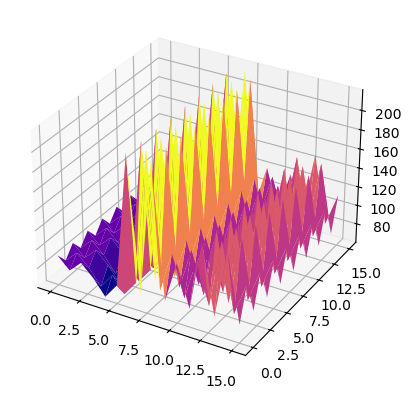

In [23]:
X, Y = np.meshgrid(index_dim, index_dim)
Z = gArr
ax = plt.subplot(projection='3d', computed_zorder=False)
ax.plot_surface(X, Y, Z, cmap='plasma', zorder=0)

#### Build 2D-DCT II Function

In [24]:
def dct_2D(data):
    M, N = data.shape
    cof = np.zeros((M, N))
    f1 = 0
    f2 = 0
    PI = math.pi

    for i in range(M):
        for j in range(N):
            if i==0:
                f1 = math.sqrt(1/(4*M))
            else:
                f1 = math.sqrt(1/(2*M))

            if j==0:
                f2 = math.sqrt(1/(4*N))
            else:
                f2 = math.sqrt(1/(2*N))

            s = 0
            for m in range(M):
                for n in range(N):
                    out = data[m][n] * math.cos((2*m+1)*i*PI / (2*M)) * math.cos((2*n+1)*j*PI / (2*N))
                    s = s + out

            cof[i][j] = 4 * f1 * f2 * s
    
    return np.around(cof, decimals=7)

In [25]:
output2D = dct_2D(gArr)
output2D

array([[ 1.65500000e+03, -1.66883051e+02, -1.92546894e+02,
         8.71857240e+00,  2.00690098e+02,  1.25885903e+02,
        -1.71993458e+02, -7.25081298e+01,  1.60000000e+01,
         5.33756808e+01,  2.09814570e+00,  3.85465950e+00,
        -3.55033036e+01, -2.65552917e+01,  2.05314812e+01,
         9.93797711e+01],
       [ 7.10528170e+00,  1.75943950e+00, -5.67712050e+00,
        -1.91841600e+00,  7.66068600e-01,  2.94516620e+00,
         1.42649080e+00,  1.60299350e+00, -6.66120160e+00,
        -5.13250270e+00,  7.65466210e+00,  2.24675326e+01,
        -1.02190941e+01, -1.02052971e+01, -1.41455550e+01,
         3.75700127e+01],
       [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         0.00000000e+00],
       [ 7.38924630e+00,  1.82975600e

In [26]:
o2D = fft.dctn(gArr, norm='ortho') # Use SciPy
o2D

array([[ 1.65500000e+03, -1.66883052e+02, -1.92546894e+02,
         8.71857237e+00,  2.00690098e+02,  1.25885903e+02,
        -1.71993458e+02, -7.25081298e+01,  1.60000000e+01,
         5.33756808e+01,  2.09814570e+00,  3.85465952e+00,
        -3.55033036e+01, -2.65552917e+01,  2.05314812e+01,
         9.93797711e+01],
       [ 7.10528169e+00,  1.75943951e+00, -5.67712049e+00,
        -1.91841597e+00,  7.66068571e-01,  2.94516616e+00,
         1.42649081e+00,  1.60299348e+00, -6.66120158e+00,
        -5.13250269e+00,  7.65466213e+00,  2.24675326e+01,
        -1.02190941e+01, -1.02052971e+01, -1.41455550e+01,
         3.75700127e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 7.38924628e+00,  1.82975601e

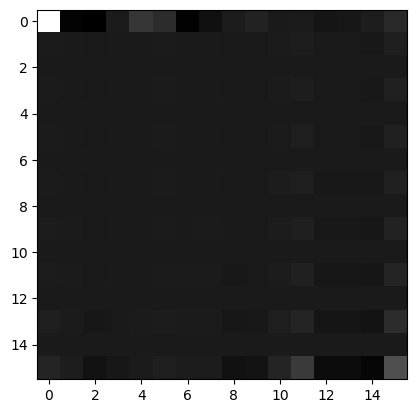

In [55]:
plt.imshow(output2D, cmap='gray')

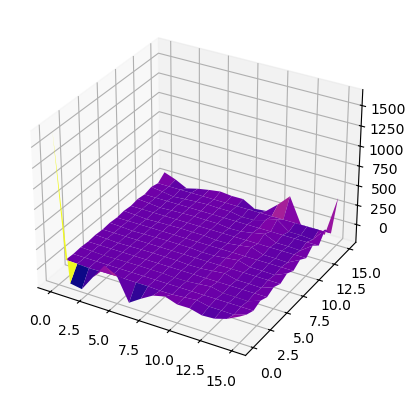

In [27]:
X, Y = np.meshgrid(index_dim, index_dim)
Z_dct2D = output2D
ax = plt.subplot(projection='3d', computed_zorder=False)
ax.plot_surface(X, Y, Z_dct2D, cmap='plasma', zorder=0)

#### Inverse 2D-DCT II Function

In [28]:
def idct_2D(cof):
    M, N = cof.shape
    data = np.zeros((M, N))
    PI = math.pi

    for i in range(M):
        for j in range(N):
            s = 0
            for m in range(M):
                for n in range(N):
                    if m == 0:
                        alpha_m = 1 / math.sqrt(M)
                    else:
                        alpha_m = math.sqrt(2 / M)

                    if n == 0:
                        alpha_n = 1 / math.sqrt(N)
                    else:
                        alpha_n = math.sqrt(2 / N)

                    s += cof[m][n] * alpha_m * alpha_n * math.cos(PI / (2 * M) * (2 * i + 1) * m) * math.cos(PI / (2 * N) * (2 * j + 1) * n)

            data[i][j] = s

    return np.around(data, decimals=7)

In [29]:
output2D_i = idct_2D(output2D)
output2D_i

array([[ 91.       ,  79.       ,  91.       ,  79.       ,  63.       ,
         79.       , 218.       ,  79.       , 218.       ,  79.       ,
        122.       ,  79.       , 150.       ,  79.0000001, 150.       ,
         79.       ],
       [ 79.       ,  91.       ,  79.       ,  63.       ,  79.       ,
         63.       ,  79.       , 218.       ,  79.       , 122.       ,
         79.       , 122.       ,  79.       , 150.       ,  79.       ,
        114.       ],
       [ 91.       ,  79.       ,  91.       ,  79.       ,  63.       ,
         79.       , 218.       ,  79.       , 218.       ,  79.       ,
        122.       ,  79.       , 150.       ,  79.       , 150.       ,
         79.       ],
       [ 79.       ,  91.       ,  79.       ,  63.       ,  79.       ,
         63.       ,  79.       , 218.       ,  79.       , 122.       ,
         79.       , 122.       ,  79.       , 150.       ,  79.       ,
        114.       ],
       [ 91.       ,  79.       ,  9

In [30]:
o2D_i = fft.idctn(output2D, norm='ortho') # Use SciPy
o2D_i

array([[ 91.00000003,  78.99999999,  90.99999999,  79.        ,
         63.00000002,  79.00000003, 218.00000002,  78.99999999,
        217.99999999,  78.99999999, 121.99999998,  78.99999997,
        150.00000002,  79.00000006, 150.        ,  78.99999999],
       [ 78.99999999,  91.00000002,  78.99999999,  62.99999996,
         78.99999997,  62.99999999,  79.        , 218.00000001,
         79.00000003, 121.99999998,  79.00000004, 121.99999997,
         78.99999999, 150.00000002,  79.        , 113.99999998],
       [ 91.00000004,  78.99999998,  91.00000001,  79.00000001,
         62.99999998,  79.00000001, 218.00000002,  79.00000003,
        218.00000001,  78.99999997, 122.        ,  79.        ,
        150.00000002,  78.99999998, 150.00000003,  78.99999998],
       [ 79.00000003,  90.99999999,  78.99999999,  62.99999996,
         79.        ,  63.00000002,  79.00000001, 218.00000002,
         79.00000002, 121.99999999,  79.        , 122.00000002,
         79.        , 150.        ,  

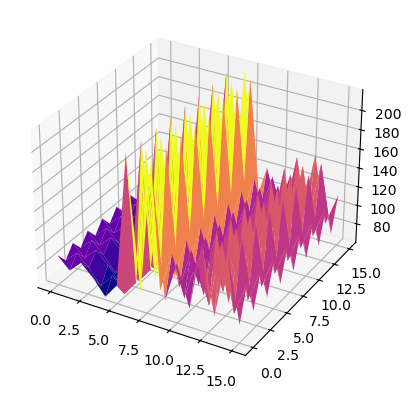

In [31]:
X, Y = np.meshgrid(index_dim, index_dim)
Z_idct2D = output2D_i
ax = plt.subplot(projection='3d', computed_zorder=False)
ax.plot_surface(X, Y, Z_idct2D, cmap='plasma', zorder=0)

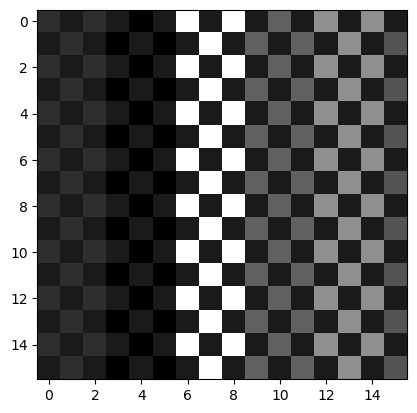

In [53]:
plt.imsave("pixel_gray.bmp", output2D_i, cmap='gray')
plt.imshow(output2D_i, cmap='gray')

#### Read Color Image

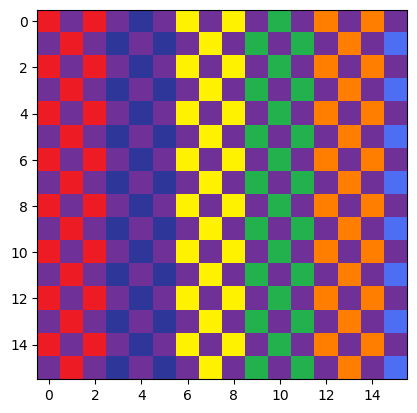

In [93]:
l2 = 'ColorImg'
path = os.path.join(cpath, l2)
imlist = os.listdir(path)
impath = os.path.join(path, imlist[0])

cArr = mping.imread(impath)
plt.imshow(cArr)

In [95]:
cArr

array([[[237,  28,  36, 255],
        [111,  49, 152, 255],
        [237,  28,  36, 255],
        ...,
        [111,  49, 152, 255],
        [255, 126,   0, 255],
        [111,  49, 152, 255]],

       [[111,  49, 152, 255],
        [237,  28,  36, 255],
        [111,  49, 152, 255],
        ...,
        [255, 126,   0, 255],
        [111,  49, 152, 255],
        [ 77, 109, 243, 255]],

       [[237,  28,  36, 255],
        [111,  49, 152, 255],
        [237,  28,  36, 255],
        ...,
        [111,  49, 152, 255],
        [255, 126,   0, 255],
        [111,  49, 152, 255]],

       ...,

       [[111,  49, 152, 255],
        [237,  28,  36, 255],
        [111,  49, 152, 255],
        ...,
        [255, 126,   0, 255],
        [111,  49, 152, 255],
        [ 77, 109, 243, 255]],

       [[237,  28,  36, 255],
        [111,  49, 152, 255],
        [237,  28,  36, 255],
        ...,
        [111,  49, 152, 255],
        [255, 126,   0, 255],
        [111,  49, 152, 255]],

       [[111

In [96]:
cArr.shape

(16, 16, 4)

#### Build 3D-DCT II Function

In [119]:
def dct_3D(data):
    M, N, P = data.shape
    cof = np.zeros((M, N, P))
    f1 = 0
    f2 = 0
    f3 = 0
    PI = math.pi

    for i in range(M):
        for j in range(N):
            for k in range(P):
                if i==0:
                    f1 = math.sqrt(1/(4*M))
                else:
                    f1 = math.sqrt(1/(2*M))
                    
                if j==0:
                    f2 = math.sqrt(1/(4*N))
                else:
                    f2 = math.sqrt(1/(2*N))

                if k==0:
                    f3 = math.sqrt(1/(4*N))
                else:
                    f3 = math.sqrt(1/(2*N))

                s = 0
                for m in range(M):
                    for n in range(N):
                        for p in range(P):
                            out = data[m][n][p] * math.cos((2*m+1)*i*PI / (2*M)) * math.cos((2*n+1)*j*PI / (2*N)) * math.cos((2*p+1)*k*PI / (2*P))
                            s = s + out
                cof[i][j][k] = 16 * f1 * f2 * f3 * s

    return np.around(cof, decimals=7)
                    

In [120]:
output3D = dct_3D(cArr)
output3D

array([[[ 4.68525000e+03, -1.34291568e+03,  1.56325000e+03,
         -2.89906217e+02],
        [-1.23105943e+02, -7.06534798e+01,  1.54128172e+02,
          2.27894194e+02],
        [-8.73500750e+01, -2.54451517e+01,  2.62718739e+02,
          3.85469069e+02],
        ...,
        [-3.35662272e+01,  4.33652417e+01,  9.93890290e+01,
          1.69317240e+01],
        [ 1.06800410e+01,  2.28582920e+00, -2.90916851e+01,
         -3.95387620e+01],
        [ 9.12465848e+01,  2.18748567e+02,  1.59383526e+02,
         -6.50016982e+01]],

       [[ 4.64063710e+00,  2.29996651e+01,  2.15156811e+01,
         -7.19552930e+00],
        [ 2.80368340e+00, -1.17138220e+00, -4.20426300e+00,
          2.40033100e-01],
        [-8.32749130e+00,  1.21694170e+00,  9.79719810e+00,
         -2.22293200e-01],
        ...,
        [-1.07874045e+01,  6.09015990e+00,  2.35942542e+01,
          8.96102620e+00],
        [-6.39420050e+00, -1.34288529e+01,  3.16519770e+00,
          2.64536995e+01],
        [ 1.398

In [121]:
o3D = fft.dctn(cArr, norm='ortho') # Use SciPy
o3D

array([[[ 4.68525000e+03, -1.34291568e+03,  1.56325000e+03,
         -2.89906217e+02],
        [-1.23105943e+02, -7.06534798e+01,  1.54128172e+02,
          2.27894194e+02],
        [-8.73500750e+01, -2.54451517e+01,  2.62718739e+02,
          3.85469069e+02],
        ...,
        [-3.35662272e+01,  4.33652417e+01,  9.93890290e+01,
          1.69317240e+01],
        [ 1.06800410e+01,  2.28582918e+00, -2.90916851e+01,
         -3.95387620e+01],
        [ 9.12465848e+01,  2.18748567e+02,  1.59383526e+02,
         -6.50016982e+01]],

       [[ 4.64063710e+00,  2.29996651e+01,  2.15156811e+01,
         -7.19552933e+00],
        [ 2.80368341e+00, -1.17138220e+00, -4.20426301e+00,
          2.40033131e-01],
        [-8.32749134e+00,  1.21694168e+00,  9.79719808e+00,
         -2.22293158e-01],
        ...,
        [-1.07874045e+01,  6.09015986e+00,  2.35942542e+01,
          8.96102619e+00],
        [-6.39420051e+00, -1.34288529e+01,  3.16519767e+00,
          2.64536995e+01],
        [ 1.398

#### Inverse 3D-DCT II Function

In [130]:
def idct_3D(cof):
    M, N, P = cof.shape
    data = np.zeros((M, N, P), dtype='uint8')
    PI = math.pi

    for i in range(M):
        for j in range(N):
            for k in range(P):
                s = 0
                for m in range(M):
                    for n in range(N):
                        for p in range(P):
                            if m == 0:
                                alpha_m = 1 / math.sqrt(M)
                            else:
                                alpha_m = math.sqrt(2 / M)

                            if n == 0:
                                alpha_n = 1 / math.sqrt(N)
                            else:
                                alpha_n = math.sqrt(2 / N)

                            if p == 0:
                                alpha_p = 1 / math.sqrt(P)
                            else:
                                alpha_p = math.sqrt(2 / P)

                            s += cof[m][n][p] * alpha_m * alpha_n * alpha_p * math.cos(PI / (2 * M) * (2 * i + 1) * m) * math.cos(PI / (2 * N) * (2 * j + 1) * n) *  math.cos(PI / (2 * P) * (2 * k + 1) * p)
                data[i][j][k] = s
    
    return np.around(data, decimals=7)

In [131]:
output3D_i = idct_3D(output3D)
output3D_i

array([[[237,  28,  36, 255],
        [111,  48, 152, 255],
        [236,  28,  35, 255],
        ...,
        [111,  49, 151, 255],
        [255, 125,   0, 255],
        [110,  48, 151, 254]],

       [[111,  48, 151, 254],
        [237,  27,  35, 255],
        [110,  49, 151, 255],
        ...,
        [255, 125,   0, 255],
        [111,  48, 152, 255],
        [ 77, 108, 243, 255]],

       [[236,  27,  36, 254],
        [110,  48, 151, 254],
        [236,  28,  35, 255],
        ...,
        [111,  49, 151, 255],
        [255, 125,   0, 254],
        [110,  48, 151, 254]],

       ...,

       [[111,  49, 152, 255],
        [237,  27,  36, 255],
        [110,  48, 152, 254],
        ...,
        [254, 126,   0, 254],
        [110,  48, 151, 255],
        [ 77, 108, 243, 255]],

       [[236,  28,  36, 255],
        [110,  49, 152, 254],
        [236,  27,  36, 254],
        ...,
        [110,  49, 151, 254],
        [254, 126,   0, 254],
        [110,  48, 151, 254]],

       [[111

In [132]:
o3D_i = fft.idctn(output3D, norm='ortho') # Use SciPy
o3D_i

array([[[ 2.37000000e+02,  2.80000000e+01,  3.60000000e+01,
          2.55000000e+02],
        [ 1.11000000e+02,  4.90000000e+01,  1.52000000e+02,
          2.55000000e+02],
        [ 2.37000000e+02,  2.80000000e+01,  3.60000000e+01,
          2.55000000e+02],
        ...,
        [ 1.11000000e+02,  4.90000000e+01,  1.52000000e+02,
          2.55000000e+02],
        [ 2.55000000e+02,  1.26000000e+02,  3.18431148e-09,
          2.55000000e+02],
        [ 1.11000000e+02,  4.90000000e+01,  1.52000000e+02,
          2.55000000e+02]],

       [[ 1.11000000e+02,  4.90000000e+01,  1.52000000e+02,
          2.55000000e+02],
        [ 2.37000000e+02,  2.80000000e+01,  3.60000000e+01,
          2.55000000e+02],
        [ 1.11000000e+02,  4.90000000e+01,  1.52000000e+02,
          2.55000000e+02],
        ...,
        [ 2.55000000e+02,  1.26000000e+02,  6.54765131e-10,
          2.55000000e+02],
        [ 1.11000000e+02,  4.90000000e+01,  1.52000000e+02,
          2.55000000e+02],
        [ 7.700

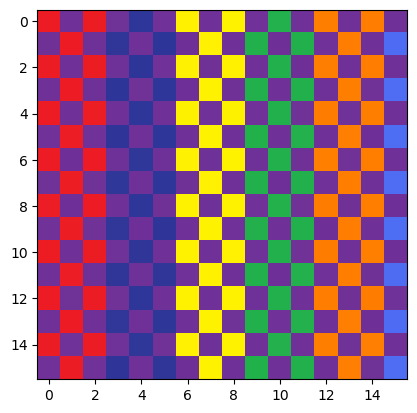

In [133]:
plt.imshow(output3D_i)

In [134]:
plt.imsave("pixel_color.bmp", output3D_i)